#  Install package

In [841]:
# ! pip install pyvis
# ! pip install networkx
# ! pip install dash
# ! pip install altair
# ! pip install panel

# Import package

In [842]:
import os
import requests
import networkx as nx
import pandas as pd
import geopandas as gpd
from pyvis.network import Network
import openai
from IPython.display import display, HTML, Code
from IPython.display import clear_output


# Define Solution class
Please run the following cell to define the functions

In [843]:
# %load_ext autoreload
# %autoreload 2

import LLM_Geo_Constants as constants
import helper
# import LLM_Geo_kernel.Solution as Solution

from LLM_Geo_kernel import Solution

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Demonstration Cases

## Input task and data desciption

In [844]:
# Case 1: population living near hazardous wastes

# task_name ='Resident_at_risk_counting'

# TASK = r"""1) Find out the total population that lives within a tract that contain hazardous waste facilities. The study area is North Carolina, US.
# 2) Generate a map to show the spatial distribution of population at the tract level and highlight the borders of tracts that have hazardous waste facilities.
# """

# DATA_LOCATIONS = ["NC hazardous waste facility ESRI shape file location: https://github.com/gladcolor/LLM- Geo/raw/master/overlay_analysis/Hazardous_Waste_Sites.zip.",
#                   "NC tract boundary shapefile location: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/tract_shp_37.zip. The tract id column is 'Tract'.",
#                   "NC tract population CSV file location: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/NC_tract_population.csv. The population is stored in 'TotalPopulation' column. The tract ID column is 'GEOID'."
#                  ]


# Case 2: France_mobility_changes_2020
task_name ='France_mobility_changes_2020'
TASK = r'''
1) Show the 2020 human mobility monthly change rates of each administrative regions in a France map. Each month is a sub-map in a map matrix. The base of the change rate is January 2020. 
2) Draw a line chart to show the monthly change rate trends of all administrative regeions. Each region is a line, the x-axis is 2020 months.
'''

DATA_LOCATIONS = ["ESRI shapefile for France administrative regions:" + \
                  "https://github.com/gladcolor/LLM-Geo/raw/master/REST_API/France.zip. " + \
                  "The 'GID_1' column is the administrative region code, 'NAME_1' column is the administrative region name.",
                  "REST API url with parameters for human mobility data access:" + \
                  "http://gis.cas.sc.edu/GeoAnalytics/REST?operation=get_daily_movement_for_all_places&source=twitter&scale=world_first_level_admin&begin=01/01/2020&end=12/31/2020." + \
                  "The response is in CSV format. There are three columns in the response: " + \
                  "place,date (format:2020-01-07), and intra_movement. 'place' column is the administractive region code of every country; codes for France administrative regions start with 'FRA'.",
                 ]

  
# Case 3: COVID-19 prevalence trend
# task_name ='COVID_death_rate'
# TASK = r'''1) Draw a map to show the death rate (death/case) of COVID-19 among the countiguous US counties. Use the accumulated COVID-19 data of 2020.12.31 to compute the death rate. Use scheme ='quantiles' when plotting the map.  Set map projection to 'Conus Albers'. Set map size to 15*10 inches.  
# 2) Draw a scatter plot to show the correlation and trend line of the death rate with the senior resident rate, including the r-square and p-value. Set data point transparency to 50%, regression line as red.  Set figure size to 15*10 inches.  
# '''

# DATA_LOCATIONS = [
#                   r"COVID-19 data case in 2020 (county-level): https://github.com/nytimes/covid-19-data/raw/master/us-counties-2020.csv. This data is for daily accumulated COVID cases and deaths for each county in the US. There are 5 columns: date (format: 2021-02-01), county, state, fips, cases, deaths. ",   
#                   r"Contiguous US county boundary (ESRI shapefile): https://github.com/gladcolor/spatial_data/raw/master/contiguous_counties.zip. The county FIPS column is 'GEOID'. ",
#                   r"Census data (ACS2020): https://raw.githubusercontent.com/gladcolor/spatial_data/master/Demography/ACS2020_5year_county.csv. THe needed columns are: 'FIPS', 'Total Population', 'Total Population: 65 to 74 Years', 'Total Population: 75 to 84 Years', 'Total Population: 85 Years and Over'. Drop rows with NaN cells after loading the used columns.",
#                  ]




# Case 4: Hospital_accessibility
# task_name ='Hospital_accessibility'

# TASK = r'''
# For each zipcode area in South Carolina (SC), calculate the distance from the centroid of the zipcode area to its nearest hospital, and then create a choropleth distance map (unit: km), also show the hospital.
# '''

# # TASK = r'Diplay the  zipcode area in South Carolina (SC) and SC hospital locations in a  map.'

# DATA_LOCATIONS = [
# r"SC zipcode boundary shapefile: https://github.com/GIBDUSC/test/raw/master/sc_zip_boundary.zip, the map projection is WGS1984.",
# r"SC hospitals:  https://github.com/gladcolor/spatial_data/raw/master/South_Carolina/SC_hospitals_with_emergency_room_cleaned.csv, location columns: longitude in 'POINT_X' column, latitude in 'POINT_Y' column.",          
# ]


  
save_dir = os.path.join(os.getcwd(), task_name)
os.makedirs(save_dir, exist_ok=True)

# create graph
# model=r"gpt-3.5-turbo"
model=r"gpt-4"
solution = Solution(
                    task=TASK,
                    task_name=task_name,
                    save_dir=save_dir,
                    data_locations=DATA_LOCATIONS,
                    model=model,
                    )
print("Prompt to get solution graph:\n")
# print(solution.graph_prompt)
print(solution.chat_history)

Prompt to get solution graph:

[{'role': 'system', 'content': 'A professional Geo-information scientist and developer good at Python.'}]


## Get graph code from GPT API

In [845]:
print(solution.chat_history)

[{'role': 'system', 'content': 'A professional Geo-information scientist and developer good at Python.'}]


In [846]:
response_for_graph = solution.get_LLM_response_for_graph() 
# print(solution.chat_history)
solution.graph_response = response_for_graph
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_graph, language='python'))

import networkx as nx

G = nx.DiGraph()

# 1. Load France administrative regions shapefile
G.add_node("france_shp_url", node_type="data", data_path="https://github.com/gladcolor/LLM-Geo/raw/master/REST_API/France.zip", description="France administrative regions shapefile URL")
G.add_node("load_france_shp", node_type="operation", description="Load France administrative regions shapefile")
G.add_edge("france_shp_url", "load_france_shp")

G.add_node("france_gdf", node_type="data", description="France administrative regions GeoDataFrame")
G.add_edge("load_france_shp", "france_gdf")

# 2. Access human mobility data via REST API
G.add_node("rest_api_url", node_type="data", data_path="http://gis.cas.sc.edu/GeoAnalytics/REST?operation=get_daily_movement_for_all_places&source=twitter&scale=world_first_level_admin&begin=01/01/2020&end=12/31/2020", description="REST API url for human mobility data")
G.add_node("access_human_mobility_data", node_type="operation", description="Get human mobility data from the REST API")
G.add_edge("rest_api_url", "access_human_mobility_data")

G.add_node("human_mobility_data", node_type="data", description="Human mobility data")
G.add_edge("access_human_mobility_data", "human_mobility_data")

# 3. Filter France administrative regions data from human mobility data
G.add_node("filter_france_data", node_type="operation", description="Filter France administrative regions data from human mobility data")
G.add_edge("human_mobility_data", "filter_france_data")

G.add_node("filtered_france_data", node_type="data", description="Filtered human mobility data for France administrative regions")
G.add_edge("filter_france_data", "filtered_france_data")

# 4. Calculate monthly mobility change rates
G.add_node("calculate_monthly_change_rates", node_type="operation", description="Calculate monthly change rates based on human mobility data")
G.add_edge("filtered_france_data", "calculate_monthly_change_rates")

G.add_node("monthly_change_rates", node_type="data", description="Human mobility monthly change rates for each administrative region")
G.add_edge("calculate_monthly_change_rates", "monthly_change_rates")

# 5. Join mobility change rates with France GeoDataFrame
G.add_node("join_monthly_change_rate_to_shapes", node_type="operation", description="Join monthly change rates with France administrative regions GeoDataFrame")
G.add_edge("monthly_change_rates", "join_monthly_change_rate_to_shapes")
G.add_edge("france_gdf", "join_monthly_change_rate_to_shapes")

G.add_node("combined_gdf", node_type="data", description="Combined GeoDataFrame with France administrative regions and human mobility monthly change rates")
G.add_edge("join_monthly_change_rate_to_shapes", "combined_gdf")

# 6. Create sub-maps for 2020 monthly change rates
G.add_node("create_monthly_submaps", node_type="operation", description="Create sub-maps for 2020 monthly change rates")
G.add_edge("combined_gdf", "create_monthly_submaps")

G.add_node("monthly_submaps", node_type="data", description="Series of consecutive sub-maps showing human mobility monthly change rates in France's administrative regions in 2020")
G.add_edge("create_monthly_submaps", "monthly_submaps")

# 7. Create line chart for monthly trend
G.add_node("create_line_chart", node_type="operation", description="Create a line chart showing the monthly change rate trends of all administrative regions")
G.add_edge("monthly_change_rates", "create_line_chart")

G.add_node("line_chart", node_type="data", description="Line chart of 2020 monthly change rate trends for France's administrative regions")
G.add_edge("create_line_chart", "line_chart")

# Save the graph to GraphML format
nx.write_graphml(G, "E:\\Research\\LLM-Geo\\France_mobility_changes_2020\\France_mobility_changes_2020.graphml")

## Execute code to generate the solution graphto generate the solution graph

In [847]:
exec(solution.code_for_graph)
solution_graph = solution.load_graph_file()

# Show the graph
G = nx.read_graphml(solution.graph_file)  
nt = helper.show_graph(G)
html_name = os.path.join(os.getcwd(), solution.task_name + '.html')  
# HTML file should in the same directory. See:
# https://stackoverflow.com/questions/65564916/error-displaying-pyvis-html-inside-jupyter-lab-cell
nt.show(name=html_name)
# html_name

E:\Research\LLM-Geo\France_mobility_changes_2020.html


## Generate prompts and code for operations (functions)

In [848]:
operations = solution.get_LLM_responses_for_operations()
solution.save_solution()

all_operation_code_str = '\n'.join([operation['operation_code'] for operation in operations])

clear_output(wait=True)
display(Code(all_operation_code_str, language='python'))

import geopandas as gpd

def load_france_shp(france_shp_url='https://github.com/gladcolor/LLM-Geo/raw/master/REST_API/France.zip'):
    """
    Load France administrative regions shapefile.
    
    france_shp_url : str
        France administrative regions shapefile URL.
    
    Returns
    -------
    france_gdf : geopandas.GeoDataFrame
        France administrative regions GeoDataFrame.`
    """
    france_gdf = gpd.read_file(france_shp_url)
    return france_gdf
import pandas as pd
import requests
from io import StringIO

def access_human_mobility_data(rest_api_url='http://gis.cas.sc.edu/GeoAnalytics/REST?operation=get_daily_movement_for_all_places&source=twitter&scale=world_first_level_admin&begin=01/01/2020&end=12/31/2020'):
    # Description: Get human mobility data from the REST API
    # rest_api_url: REST API URL to access human mobility data
    response = requests.get(rest_api_url)
    human_mobility_data = pd.read_csv(StringIO(response.text))
    return human_mobility_data
import pandas as pd
import geopandas as gpd

def filter_france_data(human_mobility_data):
    # Description: Filter France administrative regions data from human mobility data
    # human_mobility_data: Human mobility data as a Pandas DataFrame
    # Return: Filtered France data in a Pandas DataFrame

    # Select the rows containing 'FRA' in the 'place' column
    filtered_france_data = human_mobility_data[human_mobility_data['place'].str.startswith('FRA')]

    return filtered_france_data
import pandas as pd
import numpy as np

def calculate_monthly_change_rates(filtered_france_data):
    # Description: Calculate monthly change rates based on human mobility data
    # filtered_france_data: Filtered France data in a Pandas DataFrame
    # Return: Monthly change rates in a Pandas DataFrame

    # Convert date column to datetime and extract month
    filtered_france_data['date'] = pd.to_datetime(filtered_france_data['date'])
    filtered_france_data['month'] = filtered_france_data['date'].dt.month

    # Group by place and month, calculate average intra_movement
    monthly_average_movement = filtered_france_data.groupby(['month', 'place']).mean().reset_index()

    # Calculate monthly change rate by dividing the current month by the base month (January 2020)
    monthly_change_rates = monthly_average_movement.copy()
    base_month_movement = monthly_change_rates[monthly_change_rates['month'] == 1].set_index('place')['intra_movement']
    monthly_change_rates['change_rate'] = monthly_change_rates.apply(lambda row: row['intra_movement'] / base_month_movement[row['place']], axis=1)

    return monthly_change_rates
import geopandas as gpd
import pandas as pd
from tqdm import tqdm

def join_monthly_change_rate_to_shapes(france_gdf, monthly_change_rates):
    """
    Join monthly change rates with France administrative regions GeoDataFrame.
    
    france_gdf : geopandas.GeoDataFrame
        France administrative regions GeoDataFrame.
    monthly_change_rates : pandas.DataFrame
        Monthly change rates data in a Pandas DataFrame.
    
    Returns
    -------
    combined_gdf : geopandas.GeoDataFrame
        Combined France administrative regions with monthly change rates as GeoDataFrame.
    """
    # Convert the 'GID_1' and 'place' columns to string type
    france_gdf['GID_1'] = france_gdf['GID_1'].astype(str)
    monthly_change_rates['place'] = monthly_change_rates['place'].astype(str)
    
    # Merge the GeoDataFrame and DataFrame on common columns
    combined_gdf = france_gdf.merge(monthly_change_rates, left_on='GID_1', right_on='place', how='left')

    # Drop rows with NaN cells
    combined_gdf = combined_gdf.dropna(subset=['change_rate', 'GID_1'])

    return combined_gdf
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

def create_monthly_submaps(combined_gdf):
    """
   

In [849]:
all_operation_code_str = '\n'.join([operation['operation_code'] for operation in operations])
# print(all_operation_code_str)

## Generate prompts and code for assembly program

In [850]:
assembly_LLM_response = solution.get_LLM_assembly_response()
solution.assembly_LLM_response = assembly_LLM_response
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_assembly, language='python'))

def assembely_solution():
    # Load France administrative regions shapefile
    france_gdf = load_france_shp()

    # Access human mobility data
    human_mobility_data = access_human_mobility_data()

    # Filter France administrative regions data
    filtered_france_data = filter_france_data(human_mobility_data)

    # Calculate monthly change rates
    monthly_change_rates = calculate_monthly_change_rates(filtered_france_data)

    # Join monthly change rates with France administrative regions shapes
    combined_gdf = join_monthly_change_rate_to_shapes(france_gdf, monthly_change_rates)

    # Create monthly sub-maps for 2020 human mobility change rates
    monthly_submaps = create_monthly_submaps(combined_gdf)

    # Apply plt.savefig to save the submaps
    plt.subplots_adjust(top=0.95)  # Adjust the top padding to prevent the title from being cropped
    plt.savefig('france_monthly_submaps.png', dpi=300)
    plt.clf()  # Clear the figure

    # Create line chart for the monthly change rate trends
    line_chart = create_line_chart(monthly_change_rates)

    # Apply plt.savefig to save the line chart
    plt.savefig('france_monthly_change_rate_trends.png', dpi=300)
    plt.clf()  # Clear the figure

assembely_solution()

## Execute assembly code

import geopandas as gpd

def load_france_shp(france_shp_url='https://github.com/gladcolor/LLM-Geo/raw/master/REST_API/France.zip'):
    """
    Load France administrative regions shapefile.
    
    france_shp_url : str
        France administrative regions shapefile URL.
    
    Returns
    -------
    france_gdf : geopandas.GeoDataFrame
        France administrative regions GeoDataFrame.`
    """
    france_gdf = gpd.read_file(france_shp_url)
    return france_gdf
import pandas as pd
import requests
from io import StringIO

def access_human_mobility_data(rest_api_url='http://gis.cas.sc.edu/GeoAnalytics/REST?operation=get_daily_movement_for_all_places&source=twitter&scale=world_first_level_admin&begin=01/01/2020&end=12/31/2020'):
    # Description: Get human mobility data from the REST API
    # rest_api_url: REST API URL to access human mobility data
    response = requests.get(rest_api_url)
    human_mobility_data = pd.read_csv(StringIO(response.text))
    return human_mobility_data
import pandas as pd
import geopandas as gpd

def filter_france_data(human_mobility_data):
    # Description: Filter France administrative regions data from human mobility data
    # human_mobility_data: Human mobility data as a Pandas DataFrame
    # Return: Filtered France data in a Pandas DataFrame

    # Select the rows containing 'FRA' in the 'place' column
    filtered_france_data = human_mobility_data[human_mobility_data['place'].str.startswith('FRA')]

    return filtered_france_data
import pandas as pd
import numpy as np

def calculate_monthly_change_rates(filtered_france_data):
    # Description: Calculate monthly change rates based on human mobility data
    # filtered_france_data: Filtered France data in a Pandas DataFrame
    # Return: Monthly change rates in a Pandas DataFrame

    # Convert date column to datetime and extract month
    filtered_france_data['date'] = pd.to_datetime(filtered_france_data['date'])
    filtered_france_data['month'] = filtered_france_data['date'].dt.month

    # Group by place and month, calculate average intra_movement
    monthly_average_movement = filtered_france_data.groupby(['month', 'place']).mean().reset_index()

    # Calculate monthly change rate by dividing the current month by the base month (January 2020)
    monthly_change_rates = monthly_average_movement.copy()
    base_month_movement = monthly_change_rates[monthly_change_rates['month'] == 1].set_index('place')['intra_movement']
    monthly_change_rates['change_rate'] = monthly_change_rates.apply(lambda row: row['intra_movement'] / base_month_movement[row['place']], axis=1)

    return monthly_change_rates
import geopandas as gpd
import pandas as pd
from tqdm import tqdm

def join_monthly_change_rate_to_shapes(france_gdf, monthly_change_rates):
    """
    Join monthly change rates with France administrative regions GeoDataFrame.
    
    france_gdf : geopandas.GeoDataFrame
        France administrative regions GeoDataFrame.
    monthly_change_rates : pandas.DataFrame
        Monthly change rates data in a Pandas DataFrame.
    
    Returns
    -------
    combined_gdf : geopandas.GeoDataFrame
        Combined France administrative regions with monthly change rates as GeoDataFrame.
    """
    # Convert the 'GID_1' and 'place' columns to string type
    france_gdf['GID_1'] = france_gdf['GID_1'].astype(str)
    monthly_change_rates['place'] = monthly_change_rates['place'].astype(str)
    
    # Merge the GeoDataFrame and DataFrame on common columns
    combined_gdf = france_gdf.merge(monthly_change_rates, left_on='GID_1', right_on='place', how='left')

    # Drop rows with NaN cells
    combined_gdf = combined_gdf.dropna(subset=['change_rate', 'GID_1'])

    return combined_gdf
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

def create_monthly_submaps(combined_gdf):
    """
   



-------------- Running code (trial # 1/10) --------------




<string>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:52: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


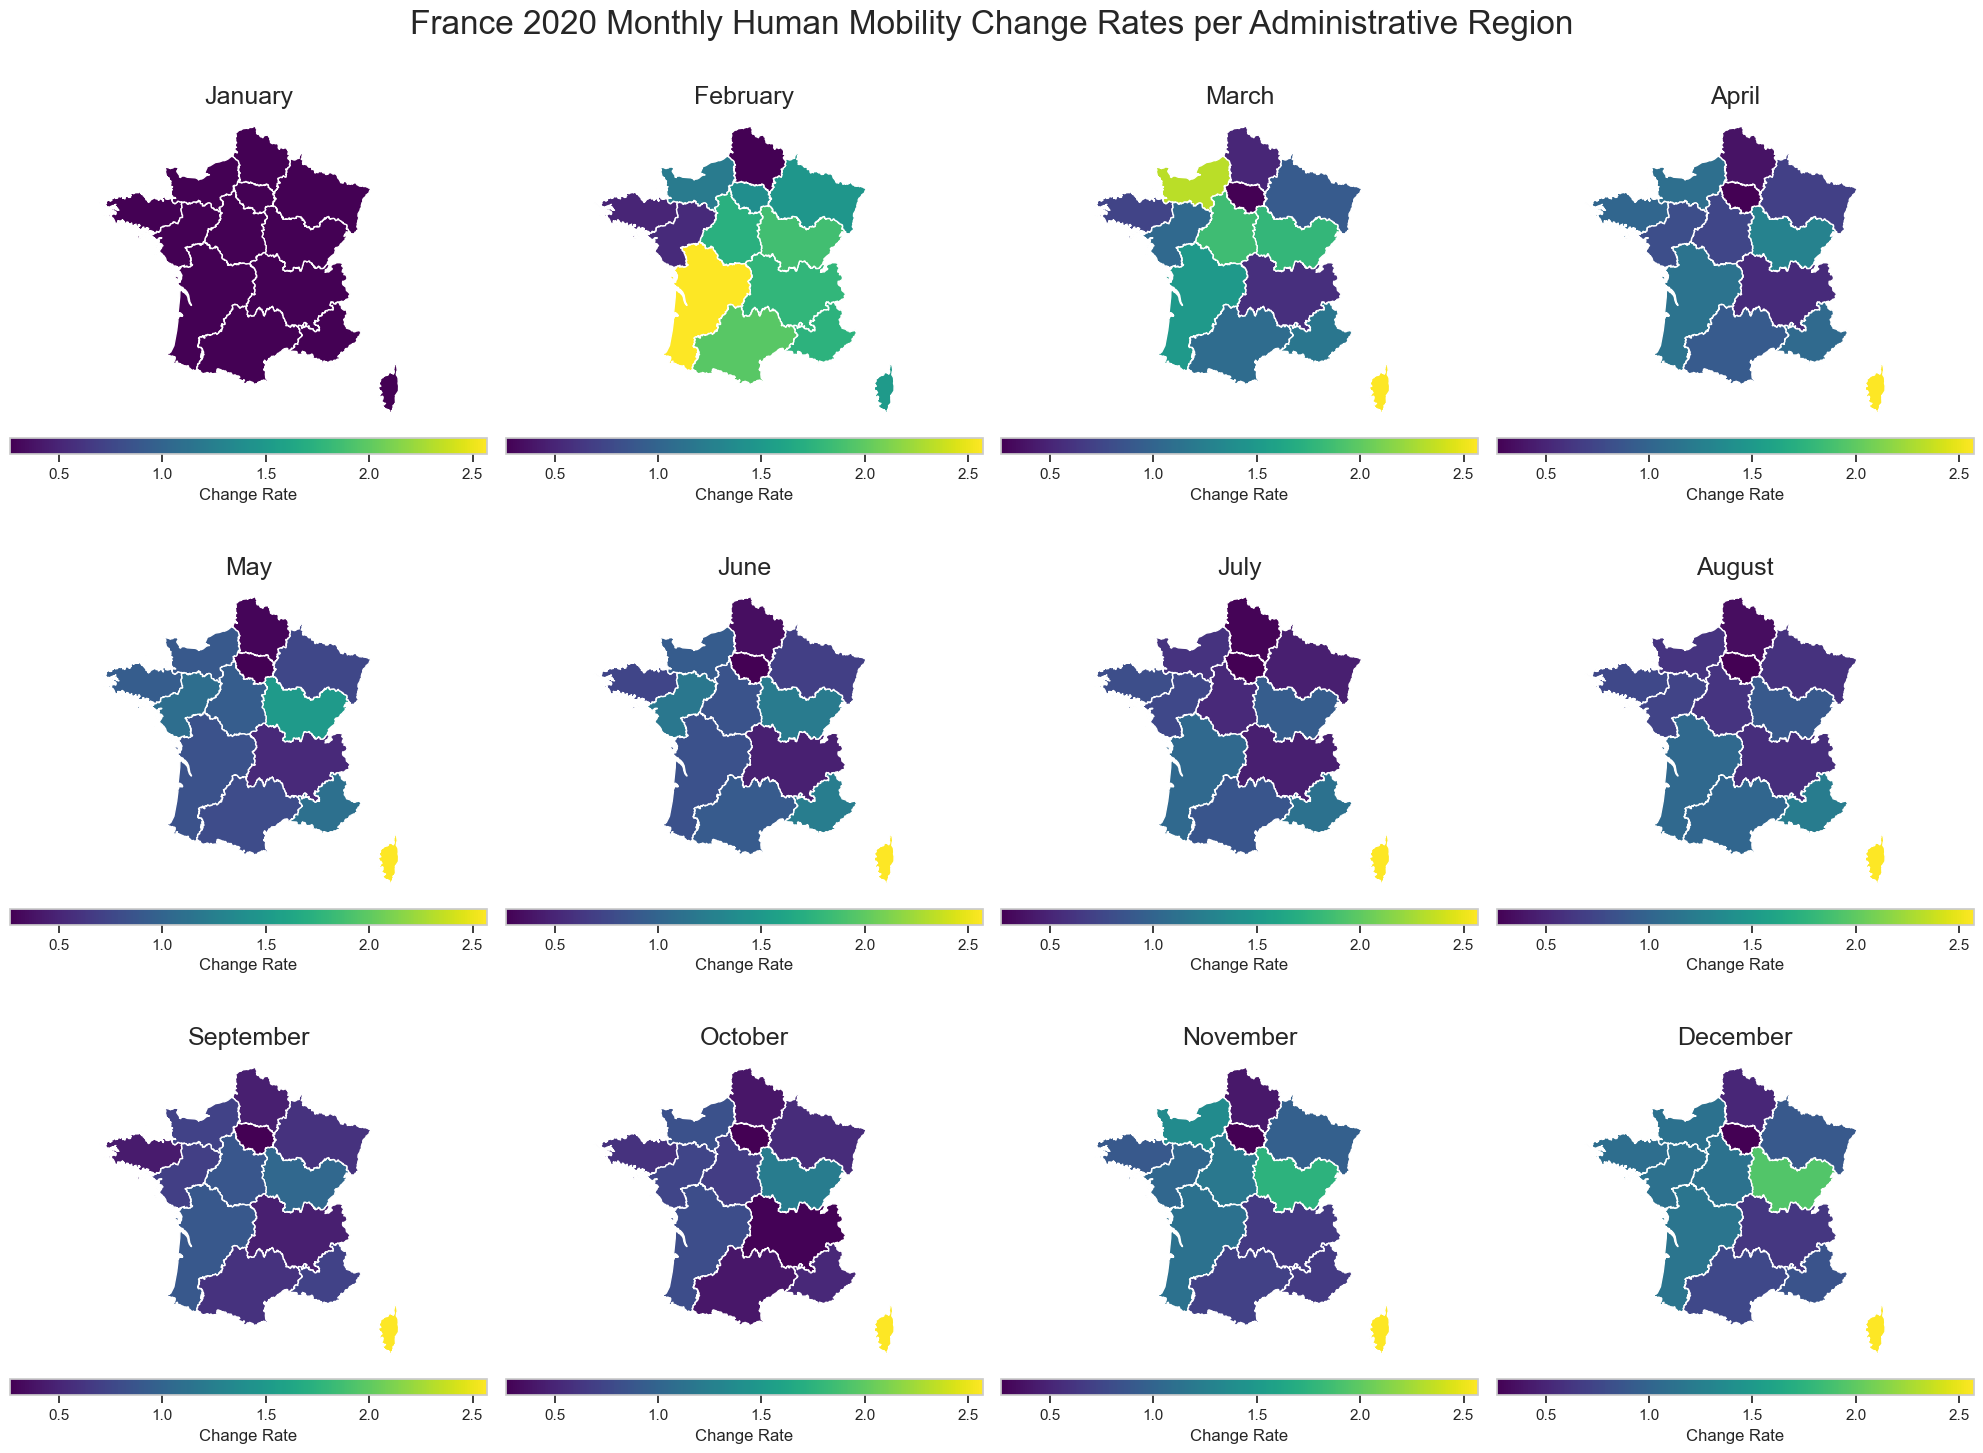



--------------- Done ---------------




<Figure size 640x480 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [851]:
all_code = all_operation_code_str + '\n' + solution.code_for_assembly

# print(solution.code_for_assembly)
display(Code(all_code, language='python'))
# display(Code(all_code, language='python'))
# clear_output(wait=True)
# exec(all_code)
all_code = solution.execute_complete_program(code=all_code, try_cnt=10)
# solution.direct_request_code = code


In [852]:
stop

NameError: name 'stop' is not defined